Interactive App for NYC Squirrel Observations

Samyu Krishnasamy
DS 4003

Description of your data, url(s), metadata/provenance (where did the data actually come from and the original purpose of that dataset)

URL: https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-10-29

Description of Data: The NYC Squirrel Census data is a unique dataset that provides insights into squirrel populations in Central Park, New York City. The dataset contains squirrel data for 3,023 sightings and includes information such as location, latitude and longitudinal coordinates, age, fur color, acitivities, and, interactions between squirrels and humans.

Data Provenance: The data was collected as part of the 2018 Central Park Squirrel Census by a team of volunteers and the Squirrel Census organization. This dataset was published on NYC Open Data. Their purpose was to count and document the squirrel population in Central Park, gather data on their activities and behaviors, and engage the public in both science and nature. The data collection involved visual surveys and standardized data recording practices to ensure consistency and reliability.

Why I chose this data and data provenance: I chose the NYC Squirrel Census data due to its unique combination of wildlife data and urban environment. It's fascinating to explore how squirrels thrive in Central Park, one of the most iconic parks in the world, situated in the midst of the urban landscape of New York City. This dataset provides a platform to understand the behaviors, seasonal patterns, and interactions of one of the most iconic creatures in New York City. I chose to delete certain variables such as 'color_notes', 'above_ground_sighter_measurement', 'zip_codes', 'lat_long', 'specific_location', 'highlight_fur_color', 'combination_of_primary_and_highlight_color', 'other_activities', 'other_interactions', and 'hectare_squirrel_number'. I will not be using these variables because they either contain too many missing observations or they are similar to other variables.

In [113]:
# import dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

In [134]:
data = pd.read_csv("nyc_squirrels.csv")

# convert 'TRUE'/'FALSE' strings to boolean values where necessary
bool_columns = ['running', 'chasing', 'climbing', 'eating', 'foraging', 'approaches', 'indifferent', 'runs_from', 'tail_flags', 'tail_twitches']
for col in bool_columns:
    data[col] = data[col].astype(bool)

# rename columns to make the noises' columns more clear
data['sound_kuk'] = data['kuks'] > 0
data['sound_quaa'] = data['quaas'] > 0
data['sound_moan'] = data['moans'] > 0
# drop the original sound columns
data.drop(['kuks', 'quaas', 'moans'], axis=1, inplace=True)


# drop other columns that might not be necessary or contain mostly 'unknown' or NaN values
columns_to_drop = ['color_notes', 'above_ground_sighter_measurement', 'zip_codes', 'lat_long', 'specific_location', 
                   'highlight_fur_color', 'combination_of_primary_and_highlight_color', 'other_activities', 
                   'other_interactions', 'hectare_squirrel_number']
data.drop(columns_to_drop, axis=1, inplace=True)

# save cleaned data set into a csv
data.to_csv('data.csv', index=False)



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   long                    3023 non-null   float64
 1   lat                     3023 non-null   float64
 2   unique_squirrel_id      3023 non-null   object 
 3   hectare                 3023 non-null   object 
 4   shift                   3023 non-null   object 
 5   date                    3023 non-null   int64  
 6   age                     2902 non-null   object 
 7   primary_fur_color       2968 non-null   object 
 8   location                2959 non-null   object 
 9   running                 3023 non-null   bool   
 10  chasing                 3023 non-null   bool   
 11  climbing                3023 non-null   bool   
 12  eating                  3023 non-null   bool   
 13  foraging                3023 non-null   bool   
 14  tail_flags              3023 

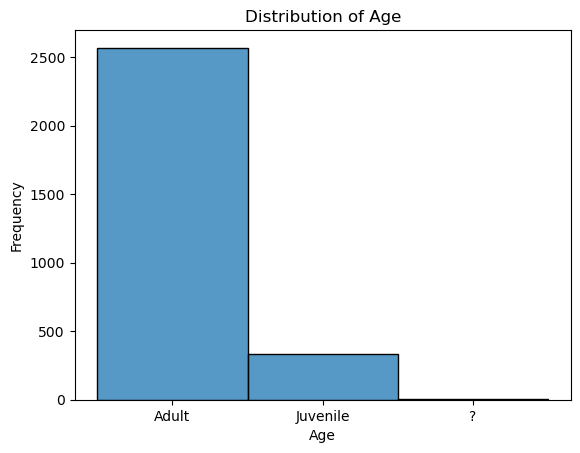

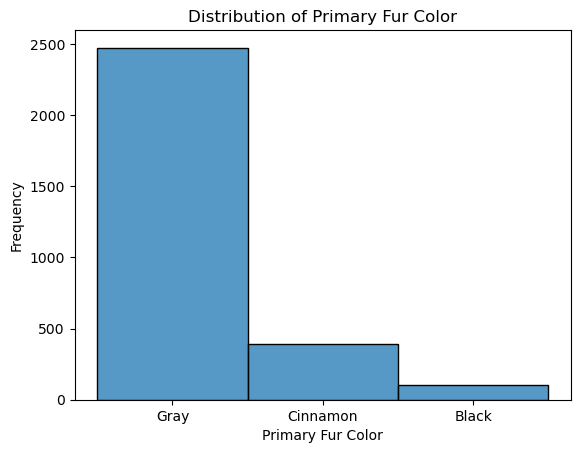

In [129]:
## EXPLORATORY ANALYSIS ##
print(f"Data Info:")
data.info()

print (" ")

print(f"Number of observations:", len(data))

print (" ")

# Unique categories for a categorical variable
print(f"Number of unique categories:")
print(f"shift:", data["shift"].nunique())
print(f"hectare:", data["hectare"].nunique())
print(f"fur color:", data["primary_fur_color"].nunique())
print(f"community districts:", data["community_districts"].nunique())
print(f"borough boundaries:", data["borough_boundaries"].nunique())
print(f"city council districts", data["city_council_districts"].nunique())
print(f"police precincts:", data["police_precincts"].nunique())

print (" ")

# Missing data per variable
print(f"Missing Data per Variable:")
print(data.isnull().sum())

print (" ")

# Distribution of continuous variables and outliers
print(f"Distribution of continuous variables and outliers:")
data.describe()

print (" ")

# For visual exploration of distributions and outliers, consider using matplotlib or seaborn for histograms and box plots
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age
sns.histplot(x=data['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for primary fur color
sns.histplot(x=data['primary_fur_color'])
plt.title('Distribution of Primary Fur Color')
plt.xlabel('Primary Fur Color')
plt.ylabel('Frequency')
plt.show()



DICTIONARY
variable name           description
_____________           ___________
long:                   Longitude (double)
lat:                    Latitude (double)
unique_squirrel_id:     Identification tag for each squirrel sighting, composed of 'Hectare ID' + 'Shift' +         
                        'Date' +'Hectare Squirrel Number: (character)
hectare:                ID tag derived from the hectare grid used for park area division and counting (character)
shift:                  Indicates whether the sighting occurred in the morning ('AM') or late afternoon ('PM')     
                        (character)
date:                   Concatenation of the sighting session day and month (double)
age:                    'Adult' or 'Juvenile' (character)
primary_fur_color:      'Gray', 'Cinnamon', or 'Black' (character)
highlight_fur_color:    Specific fur colors or combinations thereof (character)
location:               'Ground Plane' or 'Above Ground', indicating the squirrel's location when first sighted       
                        (character)
running:                Squirrel seen running (logical)
chasing:                Squirrel seen chasing (logical)
climbing:               Squirrel seen climbing (logical)
eating:                 Squirrel seen eating (logical)
foraging:               Squirrel seen foraging (logical)
kuks:                   Squirrel heard kukking, a vocal communication (logical)
quaas:                  Squirrel heard quaaing, indicating a ground predator presence (logical)
moans:                  Squirrel heard moaning, indicating an air predator presence (logical)
tail_flags:             Squirrel seen flagging its tail, a defensive or confusing motion (logical)
tail_twitches:          Squirrel seen twitching its tail, possibly as a signal to other squirrels (logical)
approaches:             Squirrel seen approaching humans, possibly seeking food (logical)
indifferent:            Squirrel indifferent to human presence (logical)
runs_from:              Squirrel seen running from humans, perceiving them as a threat (logical)
community_districts:    The community districts that the squirrel was found in (double)
borough_boundaries:     The borough broundry that the squirrel was found in (double)
city_council_districts: The city council district that the squirrel was found in (double)
police_precincts:       The closest police prencint that the squirrel was found in (double)

UI componenets to include in dashboard
One UI componement I can include in my dashboard is a dropdown to select squirrel acitivities, such as running, eating, etc. Another component I can include is a checkbox to filter the squirrels by fur color and age. Lastly, I can include a slider to select observations within a specific timeframe.

3-6 Data visulizations
The first Data visualization I want to include is a display squirrel sightings on a map of Central Park, using the latitudinal and longitudinal points for each observation. Another visualization is a bar chart showing the distribution of different squirrel activities. A similar chart is a pie chart showing the proportion of squirrels by Primary Fur Color. Lastly, I want to include a line graph showing the number of squirrel sightings over time to identify any trends or patterns.